
# Projet 2

In [144]:
# import des modules usuels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# options d'affichage
pd.set_option("display.min_rows", 16)

In [145]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [146]:
#ajout de la colonne CP:
geo['CP Ville'] = geo['Code Postal'] + ' ' + geo['Commune']
geo.head(1)

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT


In [147]:
# fonction recherche de ville
def ville(lat, long):
    return geo['Commune'][((geo['Latitude']-lat)**2 + (geo['Longitude']-long)**2).idxmin()]

In [148]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [149]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [150]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [151]:
import json

In [152]:
#Donner le décompte des valeurs accédées avec la clé "type".
ll = [json.loads(i).get('type') for i in geo.geo_shape]
for i in set(ll):
    print(i, ":", ll.count(i))

Polygon : 36670
MultiPolygon : 72


In [153]:
#Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
l = [len(json.loads(i).get('coordinates')) for i in geo.geo_shape]
print(set(l))

{1, 2, 3, 4}


In [154]:
#Quelle commune est la plus complexe géométriquement ?
geo['type']=ll
geo['lencoord']=l
geo['Commune'][geo['lencoord'] == geo['lencoord'].max()]

Code INSEE
83069    HYERES
Name: Commune, dtype: object

In [155]:
#Quelles sont les villes qui sont de type "Polygon" 
#mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

print(geo['Commune'][(geo['type'] == 'Polygon') & (geo['lencoord'] == 2)])


Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object


In [156]:
#Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la 
#librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter 
#d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [157]:
geo['poly']= [json.loads(i).get('coordinates') for i in geo.geo_shape]
p = geo['Commune'][(geo['type'] == 'Polygon') & (geo['lencoord'] == 2)]


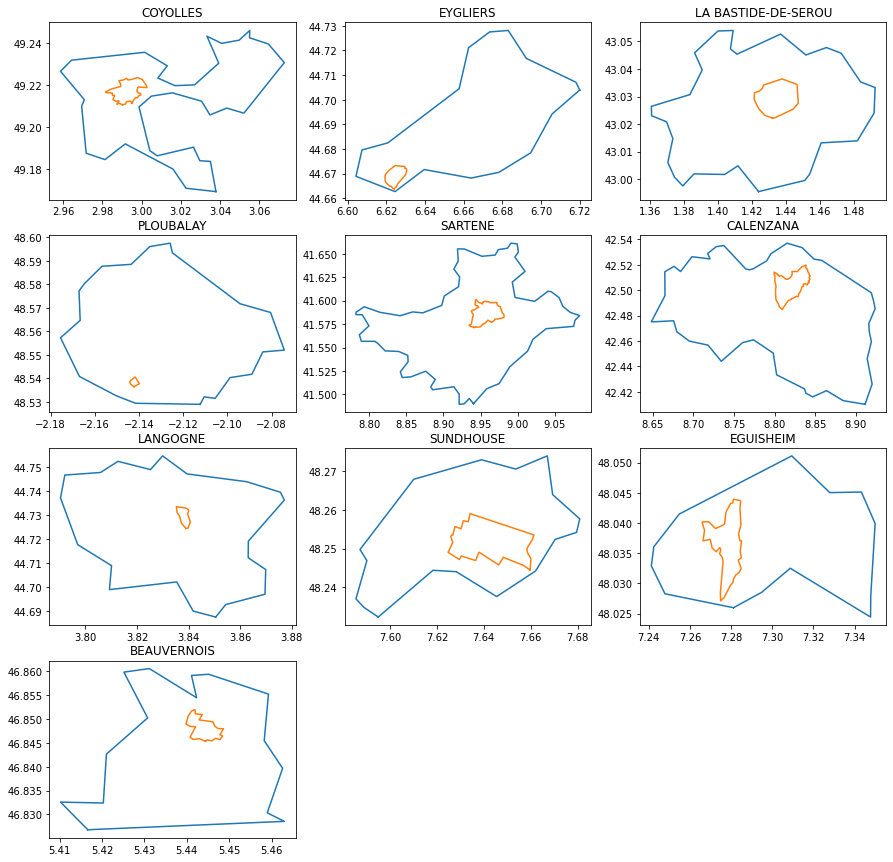

In [158]:
l = [[gm.Polygon(i[0]),gm.Polygon(i[1])] for i in geo['poly'][geo.index[(geo['type'] == 'Polygon') 
                                                                        & (geo['lencoord'] == 2)]]]

plt.figure(figsize=(15,15))

for i in range(len(l)):
    plt.subplot(4, 3, i+1)
    plt.plot(*l[i][0].exterior.xy)
    plt.plot(*l[i][1].exterior.xy)
    plt.title(geo['Commune'][geo.index[(geo['type'] == 'Polygon') & (geo['lencoord'] == 2)]][i])